## Image Filtering
Filtering is a technique for modifying or enhancing an image. For example, we can use it to highlight features and/or remove noise. The basic image filtering operations implemented here are:
- smoothing filter (moving average filter)
- sharpening filter
- edge detection

Filtering is a neighbourhood operation, in which the value of the pixel in the output image is determined by applying some alogrithm to the values of the pixels in the neighbourhood of the corresponding input pixel. All of the examples found below are linear filtering operations in which the value of an output pixel is a linear combination of the values of the pixels in the input pixels neighbourhood.

What we aim to achieve is to have a moving window across our image which calculates an average of the values of the input image within the window for the central pixel. This smoothens the contrast between pixels.

<img src="Data_Image_Filtering/convolution_graphical.png" style="width:300px;"/>

This can be acccomplished through convolution, which is a neighbourhood operation in which each output pixel is the weighted sum of neighbouring input pixels. The matrix of weights is called the convolution kernel, below we show a 3x3 kernel that we will use for our moving average filter:

<img src="Data_Image_Filtering/kernel.png" style="width:150px;"/>

To prevent against empty values at the edges of the image we can use padding, for instance we can place zero values in these cells or mirror the available values within our window. If this is not done and we ignore the edge pixels we will reduce the size of our image.

### Moving Average Filter
It takes M samples of input at a time and takes the average of that subset of data to produce a single output point, in statistics commonly named moving/rolling mean. As it is averaging the neighbouring pixels we are reducing the contrast between pixels and hence smoothening the image. An example of this is demonstrated below. 

In [60]:
# Import required libaries
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import math
import time

Image dimension = (390, 556, 3)
Image dimension = (390, 556)


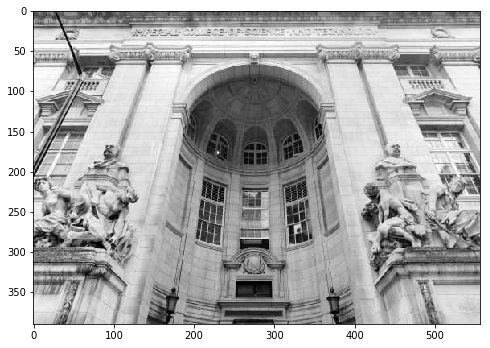

In [61]:
# Read in image
img = imageio.imread('Data_Image_Filtering/output-onlinejpgtools.jpg')

#find out image ratio
print('Image dimension =', img.shape) 

#Take weighted average of 3 layers
image = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
print('Image dimension =', image.shape) 
#To maintain orignal RGB properties apply filter to each 
#layer individually instead of averaging them

#We corrupt the image with gaussian noise for educational 
#purposes to show the filters in action clearer
#image_noisy = noise.add_noise(image, 'Data_Image_Filtering/gaussian')

#Display the result, function used throughout
def image_show(im,height,width,colour = 'gray'):
    plt.imshow(im, cmap=colour)
    plt.gcf().set_size_inches(height, width)

image_show(image_noisy,8,11)

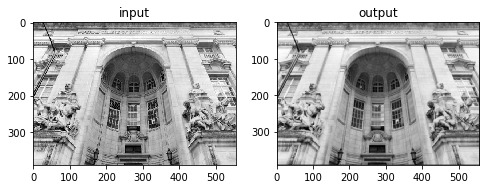

In [57]:
# Design the kernel h (3x3 filter in this case)
h=(1/9) * np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])

#Convolve the corrupted image with h
image_filtered=scipy.signal.convolve2d(image,h,mode='full', 
                                  boundary = 'fill', fillvalue=0)

def image_comp(im,height,width,colour = 'gray'):

    fig = plt.figure()

    fig.add_subplot(221), plt.title('input'), plt.set_cmap('gray')
    plt.imshow(image), plt.gcf().set_size_inches(height, width)

    fig.add_subplot(222) , plt.title('output') , plt.set_cmap(colour)
    plt.imshow(im), plt.gcf().set_size_inches(height, width)


image_comp(image_filtered,8,11)

The kernel can be of any size. Increasing the kernel size will lead to a blurrier image as more data is averaged in each step.

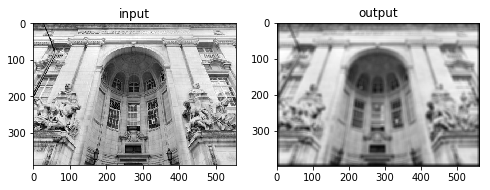

In [58]:
h=(1/81) * np.ones([9,9])
image_smooth=scipy.signal.convolve2d(image,h,mode='full',
                                     boundary = 'fill', fillvalue=0)
image_comp (image_smooth,8,11)

### Sharpening Filters

These filters work in the same fashion except that their kernel aims to increase the contrast between neighbouring pixels. This effect will be most pronounced at the pixels with the largest difference in digital numbers. 

A simple Kernel that we can use for this would be:

<img src="Data_Image_Filtering/filter_sharpen.png" style="width:100px;"/>

The effect of this filter can be see in the following image:

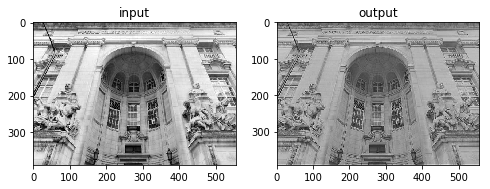

In [59]:
h=np.array([[-1/9,-1/9,-1/9],
            [-1/9,1.9,-1/9],
            [-1/9,-1/9,-1/9]])
image_sharp=scipy.signal.convolve2d(image,h,mode='full', 
                                boundary = 'fill', fillvalue=0)
image_comp (image_sharp,8,11)

In some cases the filters you will be using can be separated into two smaller filters and convolve these one after the other with our image. for instance:

<img src="Data_Image_Filtering/filter_simplified.png"  style="width:300px;"/>

What this achieves is that it can bring down our computational complexity to $ O(N^2 K) $, whereas before it was $ O(N^2 K^2) $

### Edge Detection (gradient operators)

Edges in this context refer to a stark contrast in brightness (DN value) within our image. These can be related to discontinuities in depth, discontinuities in surface orientation (angle), changes in material properties and or variation in scene illumination. These methods are valuable for data extraction in areas such as image processing, computer vision, and machine learning as it allows the extraction of structural properties of an image while reducing the amount of data.

To find these brightness discontinuities derivatives can be used to characterise these as follows

<img src="Data_Image_Filtering/differential.png" style="width:400px;"/>

The way to apply this is through finite differencing. We can express this finite differencing in a kernel (h) and convolve this with our image:

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; forward difference: $f'[x]= f[x+1]-f[x]$ &emsp;&emsp; -> &emsp;&emsp; $ h=[1,-1,0]$

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; backward difference: $f'[x]= f[x]-f[x-1]$ &emsp; -> &emsp;&emsp; $h=[0,1,-1]$

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; central difference: $f'[x]= \frac{f[x+1]-f[x-1]}{2}$ &emsp;&emsp;&emsp;&emsp;&emsp; -> &emsp;&emsp; $h=[1,0,-1]$

With his we we can design filters such as the Sobel filter which is demonstrated below.

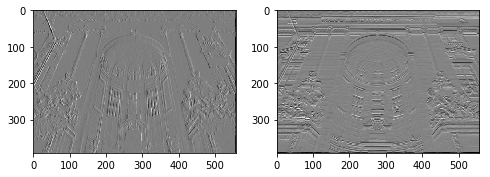

In [38]:
#Design the Sobel filters
h_sobel_x = [[1,0,-1], 
             [2,0,-2],
             [1,0,-1]] #this will be be used to convolve in the x-axis

h_sobel_y = [[1,2,1],
             [0,0,0],
             [-1,-2,-1]] # this will be used to convolve in the y-axis

# Sobel filtering
image_filtered_x=scipy.signal.convolve2d(image,h_sobel_x,mode='full', 
                                      boundary = 'fill', fillvalue=0)
image_filtered_y =scipy.signal.convolve2d(image,h_sobel_y,mode='full',
                                      boundary = 'fill', fillvalue=0)

#show both images
f, axarr = plt.subplots(1,2,figsize=(8,11)) 
axarr[0].imshow(image_filtered_x, cmap='gray')
axarr[1].imshow(image_filtered_y, cmap='gray')

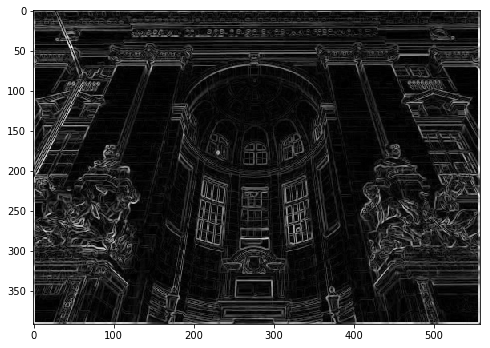

In [39]:
#Take the magnitude gradient of the two images to join them
mag = np.sqrt(np.square(image_filtered_x) + np.square(image_filtered_y))
image_show (mag,8,11)

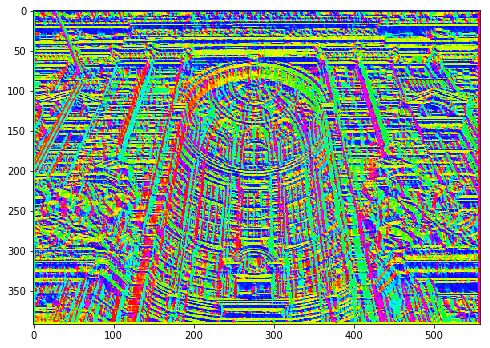

In [40]:
#extract information on the direction of the gradient
directionality = np.arctan2(image_filtered_y,image_filtered_x)
image_show (directionality,8,11, colour= 'gist_rainbow')

Our edge detection is not perfect as we do not have ideal large steps in brightness on every edge, but more of a transition.

<img src="Data_Image_Filtering/gradient.png" style="width:300px;"/>

Hence it is not always easy to say that there should be an edge between two pixels or not. One simple step we can take to greatly improve edge detection is smoothening out noise using a gaussian filter for instance. This can become very important when taking second derivatives like the laplacian as derivatives are very sensitive to noise.

For further reading image filtering and alternative kernels please see:
https://en.wikipedia.org/wiki/Kernel_(image_processing)
https://uk.mathworks.com/help/images/what-is-image-filtering-in-the-spatial-domain.html

Alternatively here you can find python functions that have the kernel integrated in the code already:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

Edge detection and more advanced methods:
https://en.wikipedia.org/wiki/Edge_detection